In [1]:
!pwd

/Users/manishanker.talusani/Desktop/Learnbay_sep19/jupyter_notebooks


In [2]:
!ls

Linear_regression_Orange_dataset.ipynb Untitled.ipynb
Logistic_regression.ipynb              orange_dataset.csv
Logistic_regression_part1.ipynb        titanic_data.csv
Multinomial Logistic Regression.ipynb


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
df =  pd.read_csv("orange_dataset.csv")

In [7]:
df.shape

(35, 4)

In [8]:
df.columns

Index(['Unnamed: 0', 'Tree', 'age', 'circumference'], dtype='object')

In [10]:
df

,Unnamed: 0,Tree,age,circumference
0,1,1,118,30
1,2,1,484,58
2,3,1,664,87
3,4,1,1004,115
4,5,1,1231,120
5,6,1,1372,142
6,7,1,1582,145
7,8,2,118,33
8,9,2,484,69
9,10,2,664,111


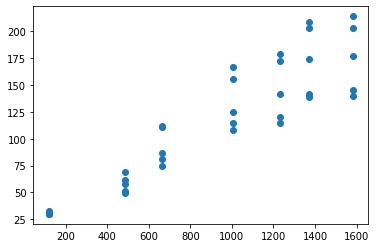

In [9]:
plt.scatter(df["age"], df["circumference"])

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [22]:
X = df["age"].values.reshape(-1,1)
y = df["circumference"]

In [23]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.score(X, y)

0.8345166945883685

In [25]:
y_pred = model.predict(X)

In [26]:
y_pred

array([ 29.9985486 ,  69.07648757,  88.29514609, 124.59705661,
       148.8339204 , 163.88853623, 186.3103045 ,  29.9985486 ,
        69.07648757,  88.29514609, 124.59705661, 148.8339204 ,
       163.88853623, 186.3103045 ,  29.9985486 ,  69.07648757,
        88.29514609, 124.59705661, 148.8339204 , 163.88853623,
       186.3103045 ,  29.9985486 ,  69.07648757,  88.29514609,
       124.59705661, 148.8339204 , 163.88853623, 186.3103045 ,
        29.9985486 ,  69.07648757,  88.29514609, 124.59705661,
       148.8339204 , 163.88853623, 186.3103045 ])

In [27]:
y_true = y

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_true)

531.2784107665086